In [341]:
turnstiles_df.groupby(['STATION','LINENAME','C/A'])['STATION','LINENAME','C/A'].count().head()

STATION  LINENAME   C/A
STATION LINENAME C/A                          
1 AV    L        H007      849       849   849
                 H008      835       835   835
103 ST  1        R170     1050      1050  1050
        6        R252     1047      1047  1047
        BC       N037      513       513   513

# Challenge Set 1:  MTA Turnstile Data

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

#### Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [6]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0  1444k      0 --:--:--  0:00:17 --:--:-- 1507k-  0:00:05 --:--:-- 1433k


In [5]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170610, 170617, 170624, 170701]
turnstiles_df = get_data(week_nums)

In [6]:
# aha!  an example where we do not have a unique index ??  hmmm..  
len(turnstiles_df)

789677

In [7]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197416,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,07:17:19,REGULAR,5554,301
197417,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,09:00:00,REGULAR,5554,301
197418,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,13:00:00,REGULAR,5554,301
197419,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,17:00:00,REGULAR,5554,301
197420,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,21:00:00,REGULAR,5554,301


In [8]:
turnstiles_df.loc[1]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,04:00:00,REGULAR,6233696,2110445


In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
# major space issue on exits
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [11]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,00:00:00,REGULAR,6203652,2101226
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,08:00:00,REGULAR,6203688,2101260
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,12:00:00,REGULAR,6203769,2101343
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,16:00:00,REGULAR,6203987,2101401



#### Exercise 1.2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

**This basically means keeping only the date, time, and entries fields
in each list.** You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [15]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [16]:
from datetime import datetime as dt

In [17]:
# develop filter, .. 
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,00:00:00,REGULAR,6203652,2101226
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,08:00:00,REGULAR,6203688,2101260
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,12:00:00,REGULAR,6203769,2101343
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,16:00:00,REGULAR,6203987,2101401


In [18]:
# Convert date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " +turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [19]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,00:00:00,REGULAR,6203652,2101226,2017-06-03 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230,2017-06-03 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,08:00:00,REGULAR,6203688,2101260,2017-06-03 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,12:00:00,REGULAR,6203769,2101343,2017-06-03 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,16:00:00,REGULAR,6203987,2101401,2017-06-03 16:00:00


In [20]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
713692,R518,R261,00-03-02,40 ST LOWERY ST,2017-06-05 08:00:00,2
526442,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 00:00:00,1
526443,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 04:00:00,1
526444,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 08:00:00,1
526445,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 12:00:00,1


In [21]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R518") & 
(turnstiles_df["UNIT"] == "R261") & 
(turnstiles_df["SCP"] == "00-03-02") & 
(turnstiles_df["STATION"] == "40 ST LOWERY ST") &
# get datetime properties ~ .dt
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2017, 6, 5, 8, 0, 0).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
178843,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,00:00:00,REGULAR,18778202,7453672,2017-06-05 00:00:00
178844,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,04:00:00,REGULAR,18778218,7453692,2017-06-05 04:00:00
178845,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,08:00:00,REGULAR,18778966,7453831,2017-06-05 08:00:00
178846,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,08:00:00,RECOVR AUD,18778965,7453831,2017-06-05 08:00:00
178847,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,12:00:00,REGULAR,18780198,7454059,2017-06-05 12:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [22]:
turnstiles_df.DESC.value_counts()

REGULAR       786980
RECOVR AUD      2697
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [23]:

turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
# Get rid of the duplicate entry
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [24]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-06-03 00:00:00,1
526514,R147,R033,04-00-03,TIMES SQ-42 ST,2017-06-07 20:00:00,1
526444,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 08:00:00,1
526445,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 12:00:00,1
526446,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 16:00:00,1


* No more duplicate Entries

#### Exercise 1.3

- **These counts are for every n hours. (What is n?) We want total daily
  entries.**

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [376]:
# Coalesce duplicate LINENAMEs that were out of order (eg. 'CBA' becomes 'ABC')
def sort_linename(linename):
    return ''.join(sorted(linename))
turnstiles_df['LINENAME'] = turnstiles_df.LINENAME.apply(sort_linename)

In [81]:
# returns a series
turnstiles_hourly = turnstiles_df.groupby\
                (["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DATE", "TIME", "DATE_TIME"])\
                ['ENTRIES','EXITS'].first().reset_index()

In [82]:
# define three new columns using 
turnstiles_hourly[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_hourly
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

In [83]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,06/03/2017,00:00:00,2017-06-03 00:00:00,6203652,2101226,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/03/2017,04:00:00,2017-06-03 04:00:00,6203674,2101230,2017-06-03 00:00:00,6203652.0,2101226.0
2,A002,R051,02-00-00,59 ST,06/03/2017,08:00:00,2017-06-03 08:00:00,6203688,2101260,2017-06-03 04:00:00,6203674.0,2101230.0
3,A002,R051,02-00-00,59 ST,06/03/2017,12:00:00,2017-06-03 12:00:00,6203769,2101343,2017-06-03 08:00:00,6203688.0,2101260.0
4,A002,R051,02-00-00,59 ST,06/03/2017,16:00:00,2017-06-03 16:00:00,6203987,2101401,2017-06-03 12:00:00,6203769.0,2101343.0


In [84]:
# Drop rows for first date
turnstiles_hourly.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [85]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,06/03/2017,04:00:00,2017-06-03 04:00:00,6203674,2101230,2017-06-03 00:00:00,6203652.0,2101226.0
2,A002,R051,02-00-00,59 ST,06/03/2017,08:00:00,2017-06-03 08:00:00,6203688,2101260,2017-06-03 04:00:00,6203674.0,2101230.0
3,A002,R051,02-00-00,59 ST,06/03/2017,12:00:00,2017-06-03 12:00:00,6203769,2101343,2017-06-03 08:00:00,6203688.0,2101260.0
4,A002,R051,02-00-00,59 ST,06/03/2017,16:00:00,2017-06-03 16:00:00,6203987,2101401,2017-06-03 12:00:00,6203769.0,2101343.0
5,A002,R051,02-00-00,59 ST,06/03/2017,20:00:00,2017-06-03 20:00:00,6204271,2101450,2017-06-03 16:00:00,6203987.0,2101401.0


In [86]:
# sanity check : when are previous entries greater than current ? 
turnstiles_hourly[turnstiles_hourly["ENTRIES"] < turnstiles_hourly["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
2447,A006,R079,00-00-02,5 AV/59 ST,06/18/2017,14:00:00,2017-06-18 14:00:00,5439480,16169264,2017-06-18 10:00:00,7807254.0,3433327.0
5720,A011,R080,01-00-00,57 ST-7 AV,06/03/2017,04:00:00,2017-06-03 04:00:00,886917698,492571284,2017-06-03 00:00:00,886917876.0,492571326.0
5721,A011,R080,01-00-00,57 ST-7 AV,06/03/2017,08:00:00,2017-06-03 08:00:00,886917638,492570955,2017-06-03 04:00:00,886917698.0,492571284.0
5722,A011,R080,01-00-00,57 ST-7 AV,06/03/2017,12:00:00,2017-06-03 12:00:00,886917354,492570248,2017-06-03 08:00:00,886917638.0,492570955.0
5723,A011,R080,01-00-00,57 ST-7 AV,06/03/2017,16:00:00,2017-06-03 16:00:00,886916793,492569519,2017-06-03 12:00:00,886917354.0,492570248.0


In [87]:
# What's the deal with counter going in reverse ? 
# investigate this with turnstiles_df
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2017, 6, 3).date()))
turnstiles_df[mask].head()

# entries going up, datetime going down

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1433,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,20:00:00,REGULAR,886916139,492568911,2017-06-03 20:00:00
1432,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,16:00:00,REGULAR,886916793,492569519,2017-06-03 16:00:00
1431,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,12:00:00,REGULAR,886917354,492570248,2017-06-03 12:00:00
1430,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,08:00:00,REGULAR,886917638,492570955,2017-06-03 08:00:00
1429,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,04:00:00,REGULAR,886917698,492571284,2017-06-03 04:00:00


* Counter working in Reverse??? - WHHHAT

In [88]:
# Let's see how many stations have this problem

(turnstiles_hourly[turnstiles_hourly["ENTRIES"] < turnstiles_hourly["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A006   R079  00-00-02  5 AV/59 ST           1
A011   R080  01-00-00  57 ST-7 AV         170
A025   R023  01-03-01  34 ST-HERALD SQ    167
             01-03-02  34 ST-HERALD SQ    165
A043   R462  00-06-00  CANAL ST             2
A049   R088  02-05-00  CORTLANDT ST        40
A060   R001  00-00-02  WHITEHALL S-FRY      1
             00-00-04  WHITEHALL S-FRY      1
             00-00-06  WHITEHALL S-FRY      1
A066   R118  00-00-00  CANAL ST           167
B020   R263  00-05-00  AVENUE H             1
B025   R150  00-00-01  AVENUE U             1
C021   R212  00-00-02  59 ST              178
E011   R371  00-06-01  79 ST                1
H003   R163  01-00-02  6 AV               166
H009   R235  00-06-05  BEDFORD AV           1
H023   R236  00-06-00  DEKALB AV          167
J034   R007  00-00-02  104 ST             124
JFK01  R535  00-00-02  HOWARD BCH JFK       1
JFK02  R535  01-00-03  HOWARD BCH JFK       1
JFK03  R536  00-03-00  JFK JAMAICA CT1   

In [89]:
def get_counts(row, max_counter, col_name):
    counter = row[col_name] - row["PREV_"+col_name]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
#         print(row[col_name], row["PREV_"+col_name])
        counter = min(row[col_name], row["PREV_"+col_name])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

In [90]:
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_hourly["HOURLY_ENTRIES"] = turnstiles_hourly.apply(get_counts, col_name='ENTRIES', axis=1, max_counter=10000)
turnstiles_hourly["HOURLY_EXITS"] = turnstiles_hourly.apply(get_counts, col_name='EXITS', axis=1, max_counter=10000)

In [91]:
turnstiles_hourly['TOTAL_TRAFFIC'] = turnstiles_hourly.HOURLY_ENTRIES + turnstiles_hourly.HOURLY_EXITS
turnstiles_hourly['DT_DIFF'] = turnstiles_hourly.DATE_TIME - turnstiles_hourly.PREV_DATE
turnstiles_hourly['DOW'] = turnstiles_hourly['DATE_TIME'].dt.weekday_name

# Create WEEKEND field
weekend_indices = turnstiles_hourly[(turnstiles_hourly.DOW == 'Saturday') | (turnstiles_hourly.DOW == 'Sunday')].index
weekday_indices = turnstiles_hourly[(turnstiles_hourly.DOW != 'Saturday') & (turnstiles_hourly.DOW != 'Sunday')].index
turnstiles_hourly.loc[weekend_indices, 'WEEKEND'] = 'Weekend'
turnstiles_hourly.loc[weekday_indices, 'WEEKEND'] = 'Weekday'

In [122]:
turnstiles_hourly.loc[1,'TIME'] < datetime.time(12, 0)

True

In [117]:
# Turn TIME from string to timestamp
turnstiles_hourly['TIME'] = turnstiles_hourly['TIME']. \
    apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').time())

In [126]:
AM_indices = turnstiles_hourly[turnstiles_hourly.TIME < datetime.time(14,0)].index
PM_indices = turnstiles_hourly[turnstiles_hourly.TIME >= datetime.time(14,0)].index
turnstiles_hourly.loc[AM_indices, 'TOD'] = 'AM'
turnstiles_hourly.loc[PM_indices, 'TOD'] = 'PM'

In [127]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,TOTAL_TRAFFIC,DT_DIFF,DOW,WEEKEND,TOD
1,A002,R051,02-00-00,59 ST,06/03/2017,04:00:00,2017-06-03 04:00:00,6203674,2101230,2017-06-03 00:00:00,6203652.0,2101226.0,22.0,4.0,26.0,04:00:00,Saturday,Weekend,AM
2,A002,R051,02-00-00,59 ST,06/03/2017,08:00:00,2017-06-03 08:00:00,6203688,2101260,2017-06-03 04:00:00,6203674.0,2101230.0,14.0,30.0,44.0,04:00:00,Saturday,Weekend,AM
3,A002,R051,02-00-00,59 ST,06/03/2017,12:00:00,2017-06-03 12:00:00,6203769,2101343,2017-06-03 08:00:00,6203688.0,2101260.0,81.0,83.0,164.0,04:00:00,Saturday,Weekend,AM
4,A002,R051,02-00-00,59 ST,06/03/2017,16:00:00,2017-06-03 16:00:00,6203987,2101401,2017-06-03 12:00:00,6203769.0,2101343.0,218.0,58.0,276.0,04:00:00,Saturday,Weekend,PM
5,A002,R051,02-00-00,59 ST,06/03/2017,20:00:00,2017-06-03 20:00:00,6204271,2101450,2017-06-03 16:00:00,6203987.0,2101401.0,284.0,49.0,333.0,04:00:00,Saturday,Weekend,PM


In [ ]:
# Normalized traffic
turnstiles_hourly['SECONDS'] = turnstiles_hourly['DT_DIFF'].dt.total_seconds()
turnstiles_norm = turnstiles_hourly[turnstiles_hourly['SECONDS']>300]
def norm_traffic(row, col_name):
    normed = row[col_name]/row['SECONDS'] * 600
    return normed
    
turnstiles_norm['NORMED_ENTRIES'] = turnstiles_norm.apply(norm_traffic, axis=1, col_name='HOURLY_ENTRIES')

In [304]:
for day in ['Weekday','Weekend']:
    for tod in ['AM','PM']:
        mask = ((turnstiles_hourly.WEEKEND == day) 
            & (turnstiles_hourly.TOD == tod)
        #    & (turnstiles_hourly.DT_DIFF == pd.Timedelta('4 hours'))
               )
        df = turnstiles_hourly[mask].groupby(['STATION']).agg({'HOURLY_EXITS': 'sum'}) \
            .sort_values(by='HOURLY_EXITS', ascending=False).head(5)
#         df.plot(kind='barh', title=day + tod, )
        print(day, tod, df)

Weekday AM                  HOURLY_EXITS
STATION                      
GRD CNTRL-42 ST     1742041.0
34 ST-HERALD SQ     1175766.0
TIMES SQ-42 ST      1081410.0
34 ST-PENN STA      1029541.0
FULTON ST           1004491.0
Weekday PM                  HOURLY_EXITS
STATION                      
34 ST-PENN STA      1870904.0
GRD CNTRL-42 ST     1179945.0
34 ST-HERALD SQ     1134339.0
42 ST-PORT AUTH     1027415.0
TIMES SQ-42 ST       874225.0
Weekend AM                  HOURLY_EXITS
STATION                      
34 ST-PENN STA       236625.0
34 ST-HERALD SQ      222947.0
14 ST-UNION SQ       222903.0
GRD CNTRL-42 ST      204058.0
TIMES SQ-42 ST       190393.0
Weekend PM                  HOURLY_EXITS
STATION                      
34 ST-PENN STA       366211.0
34 ST-HERALD SQ      294366.0
14 ST-UNION SQ       285503.0
TIMES SQ-42 ST       267362.0
42 ST-PORT AUTH      264155.0


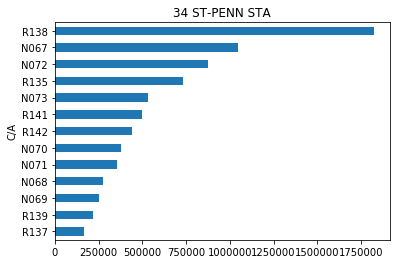

In [204]:
# Which Control Areas (C/A) get the most traffic?
station = '34 ST-PENN STA'
df = turnstiles_hourly[turnstiles_hourly.STATION==station]
df.groupby(['C/A']).TOTAL_TRAFFIC.sum().sort_values().plot(kind='barh', title=station)

### Match stations to location?

In [241]:
entrances_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv')

lat_long = entrances_df.groupby(['Station_Name'])['Station_Latitude','Station_Longitude'].first()
lat_long.reset_index(inplace=True)

In [225]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [258]:
stations = turnstiles_df.STATION.unique().tolist()

lat_long['STATION'] = lat_long.Station_Name.apply(lambda x:
                                                  process.extractOne(x, stations, scorer=fuzz.token_sort_ratio)[0])
lat_long['Match Score'] = lat_long.Station_Name.apply(lambda x:
                                                  process.extractOne(x, stations, scorer=fuzz.token_sort_ratio)[1])

In [260]:
lat_long.head(10)

,Station_Name,Station_Latitude,Station_Longitude,STATION,Match Score
0,103rd St,40.796092,-73.961454,103 ST,86
1,104th St-102nd St,40.695178,-73.844330,14TH STREET,57
2,104th St-Oxford Av,40.681711,-73.837683,FOREST AVE,57
3,110th St,40.795020,-73.944250,110 ST,86
4,110th St-Central Park North,40.799075,-73.951822,CENTRAL PK N110,57
5,111th St,40.697418,-73.836345,111 ST,86
6,111th St-Greenwood Av,40.684331,-73.832163,GREENPOINT AV,59
7,116th St,40.805085,-73.954882,116 ST,86
8,116th St-Columbia University,40.807722,-73.964110,116 ST-COLUMBIA,70
9,121st St,40.700492,-73.828294,121 ST,86


In [272]:
# Add zip codes
from geopy.geocoders import Nominatim
geolocator = Nominatim()

# See an example of how this works
location = geolocator.reverse("40.697418, -73.836345")
print(location.address)
print(location.raw['address'])

112-02, Jamaica Avenue, Brooklyn Manor, Queens County, NYC, New York, 11418, United States of America
{'house_number': '112-02', 'road': 'Jamaica Avenue', 'neighbourhood': 'Brooklyn Manor', 'county': 'Queens County', 'city': 'NYC', 'state': 'New York', 'postcode': '11418', 'country': 'United States of America', 'country_code': 'us'}


In [281]:
def find_address(lat, long):
    from geopy.geocoders import Nominatim
    geolocator = Nominatim()
    latlong = str(lat) + ', ' + str(long)
    location = geolocator.reverse(latlong)
    return location.raw['address']

In [305]:
lat_long['postcode'] = lat_long.apply(lambda row: find_address(
                row['Station_Latitude'], row['Station_Longitude'])['postcode'], axis=1)

In [327]:
lat_long.head(15)

,Station_Name,Station_Latitude,Station_Longitude,STATION,Match Score,postcode,short_zip
0,103rd St,40.796092,-73.961454,103 ST,86,10025,10025
1,104th St-102nd St,40.695178,-73.844330,14TH STREET,57,11418,11418
2,104th St-Oxford Av,40.681711,-73.837683,FOREST AVE,57,11417,11417
3,110th St,40.795020,-73.944250,110 ST,86,10029,10029
4,110th St-Central Park North,40.799075,-73.951822,CENTRAL PK N110,57,10026,10026
5,111th St,40.697418,-73.836345,111 ST,86,11418,11418
6,111th St-Greenwood Av,40.684331,-73.832163,GREENPOINT AV,59,11419,11419
7,116th St,40.805085,-73.954882,116 ST,86,10026,10026
8,116th St-Columbia University,40.807722,-73.964110,116 ST-COLUMBIA,70,10027,10027
9,121st St,40.700492,-73.828294,121 ST,86,11418,11418


In [326]:
# Shorten 
lat_long['short_zip'] = lat_long.postcode.apply(lambda x: x[:5])

In [330]:
good_zips = [10016, 10023, 10024, 10025, 11211, 11215, 11235, 11375]
good_zips = [str(x) for x in good_zips]

In [333]:
lat_long[lat_long.short_zip.apply(lambda x: x in good_zips)]

,Station_Name,Station_Latitude,Station_Longitude,STATION,Match Score,postcode,short_zip
0,103rd St,40.796092,-73.961454,103 ST,86,10025,10025
57,33rd St,40.746081,-73.982076,33 ST,83,10016,10016
69,4th Av,40.670272,-73.989779,7 AV,60,11215,11215
76,59th St-Columbus Circle,40.768247,-73.981929,59 ST COLUMBUS,76,10023,10023
83,67th Av,40.726523,-73.852719,67 AV,83,11375,11375
87,72nd St,40.775594,-73.976410,72 ST,83,10023,10023
88,75th Av,40.718331,-73.837324,75 AV,83,11375,11375
103,9th St,40.670847,-73.988302,9TH STREET,75,11215,11215
133,Bedford Av,40.717304,-73.956872,BEDFORD AV,100,11211,11211
146,Brighton Beach,40.577621,-73.961376,BRIGHTON BEACH,100,11235,11235
